In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from scipy import stats

def time_elapsed(sec):
  h = int(sec/3600)
  m = int(sec/60)
  s = sec % 60
  return "{}:{:>02}:{:>05.2f}".format(h,m,s)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [128]:
train = pd.read_csv('H:/Projekty/House Prices/train.csv')
test = pd.read_csv('H:/Projekty/House Prices/test.csv')

In [129]:
# See how data looks
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [130]:
train[0:500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      1          60       RL         65.0     8450   Pave   NaN      Reg   
1      2          20       RL         80.0     9600   Pave   NaN      Reg   
2      3          60       RL         68.0    11250   Pave   NaN      IR1   
3      4          70       RL         60.0     9550   Pave   NaN      IR1   
4      5          60       RL         84.0    14260   Pave   NaN      IR1   
5      6          50       RL         85.0    14115   Pave   NaN      IR1   
6      7          20       RL         75.0    10084   Pave   NaN      Reg   
7      8          60       RL          NaN    10382   Pave   NaN      IR1   
8      9          50       RM         51.0     6120   Pave   NaN      Reg   
9     10         190       RL         50.0     7420   Pave   NaN      Reg   
10    11          20       RL         70.0    11200   Pave   NaN      Reg   
11    12          60       RL         85.0    11924   Pave   NaN      IR1   
12    13          20       RL          NaN    12968   Pave   NaN      IR2   
13    14          20       RL         91.0    10652   Pave   NaN      IR1   
14    15          20       RL          NaN    10920   Pave   NaN      IR1   
15    16          45       RM         51.0     6120   Pave   NaN      Reg   
16    17          20       RL          NaN    11241   Pave   NaN      IR1   
17    18          90       RL         72.0    10791   Pave   NaN      Reg   
18    19          20       RL         66.0    13695   Pave   NaN      Reg   
19    20          20       RL         70.0     7560   Pave   NaN      Reg   
20    21          60       RL        101.0    14215   Pave   NaN      IR1   
21    22          45       RM         57.0     7449   Pave  Grvl      Reg   
22    23          20       RL         75.0     9742   Pave   NaN      Reg   
23    24         120       RM         44.0     4224   Pave   NaN      Reg   
24    25          20       RL          NaN     8246   Pave   NaN      IR1   
25    26          20       RL        110.0    14230   Pave   NaN      Reg   
26    27          20       RL         60.0     7200   Pave   NaN      Reg   
27    28          20       RL         98.0    11478   Pave   NaN      Reg   
28    29          20       RL         47.0    16321   Pave   NaN      IR1   
29    30          30       RM         60.0     6324   Pave   NaN      IR1   
30    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31    32          20       RL          NaN     8544   Pave   NaN      IR1   
32    33          20       RL         85.0    11049   Pave   NaN      Reg   
33    34          20       RL         70.0    10552   Pave   NaN      IR1   
34    35         120       RL         60.0     7313   Pave   NaN      Reg   
35    36          60       RL        108.0    13418   Pave   NaN      Reg   
36    37          20       RL        112.0    10859   Pave   NaN      Reg   
37    38          20       RL         74.0     8532   Pave   NaN      Reg   
38    39          20       RL         68.0     7922   Pave   NaN      Reg   
39    40          90       RL         65.0     6040   Pave   NaN      Reg   
40    41          20       RL         84.0     8658   Pave   NaN      Reg   
41    42          20       RL        115.0    16905   Pave   NaN      Reg   
42    43          85       RL          NaN     9180   Pave   NaN      IR1   
43    44          20       RL          NaN     9200   Pave   NaN      IR1   
44    45          20       RL         70.0     7945   Pave   NaN      Reg   
45    46         120       RL         61.0     7658   Pave   NaN      Reg   
46    47          50       RL         48.0    12822   Pave   NaN      IR1   
47    48          20       FV         84.0    11096   Pave   NaN      Reg   
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
49    50          20       RL         66.0     7742   Pave   NaN      Reg   
50    51          60       RL          NaN    13869   Pave   NaN      IR2   
51

## 1.0 Fill empty values

In [131]:
df = pd.concat((train, test)).reset_index(drop=True)
# note that every column must be checked before valid filling
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')
# see into description how to fill NaN values int True Columns

Columns that need filling: 
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


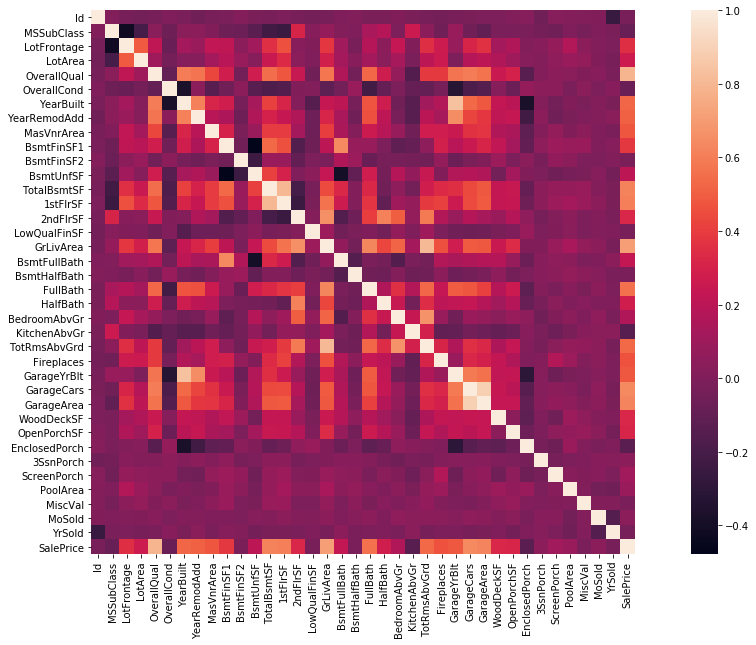

In [132]:
# See correlation of each columns, that will help to fill some empty values
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmax=1, square=True)

In [133]:
#                   LotFrontage
# Bigest correltation of this column is to 1stFlrSF
# we are assuming that there is a linear dependings of this two columns

relation=(df["1stFlrSF"]/df["LotFrontage"]).median()
df['LotFrontage'] = df['LotFrontage'].fillna(df['1stFlrSF']/relation)


In [134]:
# columns where none means no exixting item
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','FireplaceQu','MasVnrType','MSSubClass','Fence','Alley','MiscFeature','PoolQC'):
    df[col] = df[col].fillna('None')
    
# see remaining empty columns
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

Columns that need filling: 
MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64


In [135]:
# if there are no garage or basement, these columns are empty
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    df[col] = df[col].fillna(0)
    
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

Columns that need filling: 
MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
Electrical        1
KitchenQual       1
Functional        2
SaleType          1
SalePrice      1459
dtype: int64


In [136]:
# fill columns with single missing with most common values
for col in ('MSZoning', 'Utilities', 'Exterior1st','Exterior2nd', 'Electrical', 'KitchenQual','Functional', 'SaleType'):
    df[col] = df[col].fillna(df[col].mode()[0])
    
empties = df.isnull().sum()
print(f'Columns that need filling: \n{empties[empties > 0]}')

# now there is only test data with empty sale price

Columns that need filling: 
SalePrice    1459
dtype: int64


## 2.0 Deal with outliers

In [137]:
# split temporary to no delete test rows by accident
train = df[df['SalePrice'].notnull()]
test = df[df['SalePrice'].isnull()]
del df

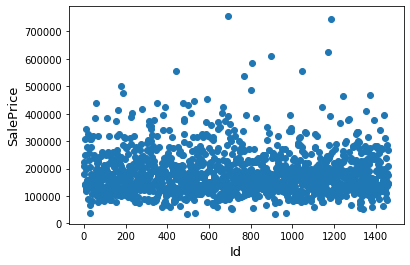

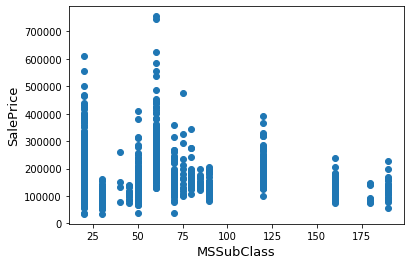

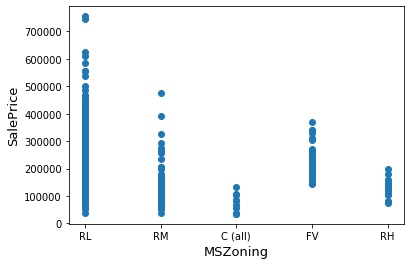

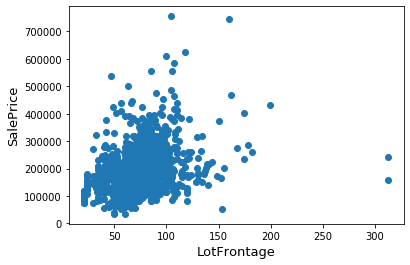

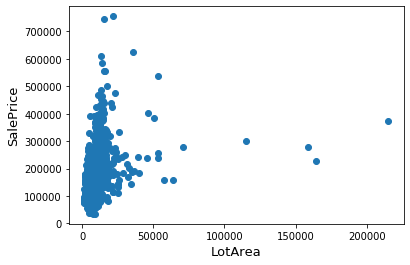

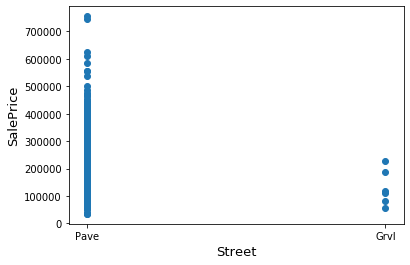

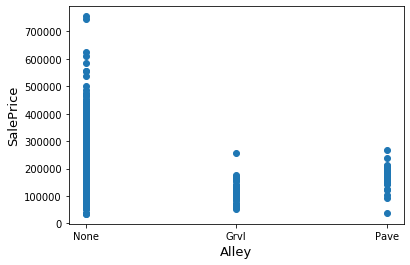

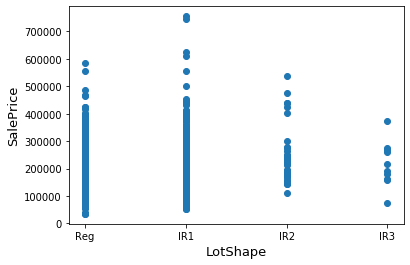

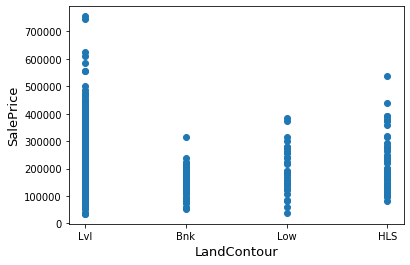

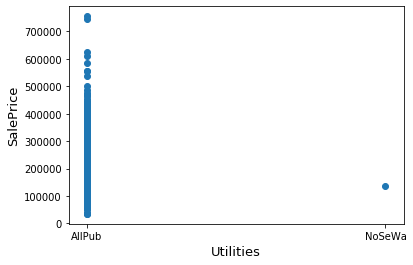

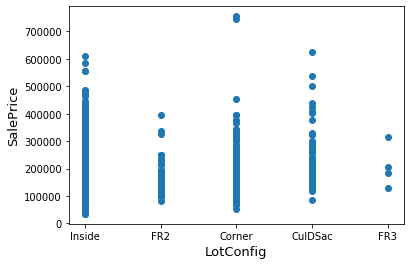

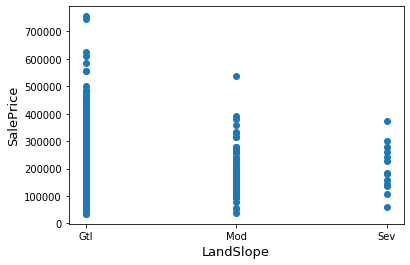

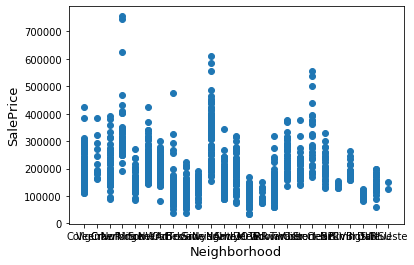

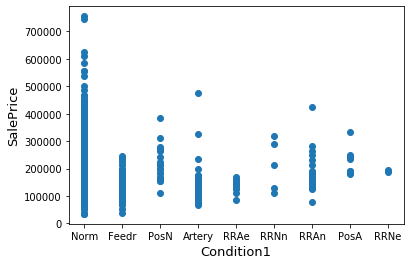

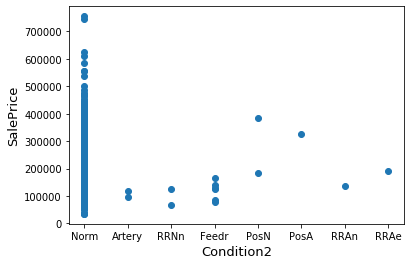

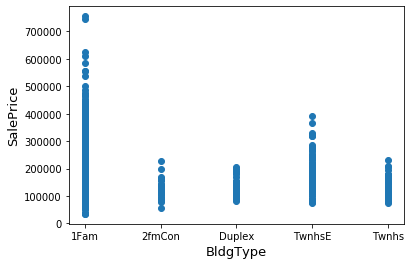

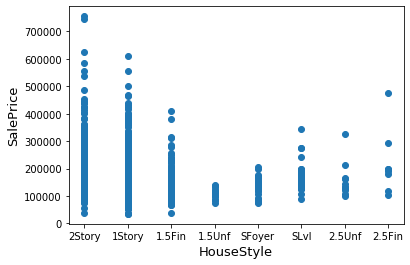

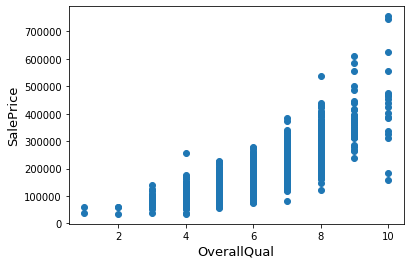

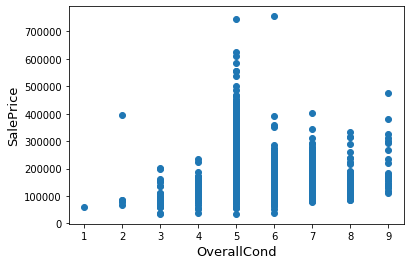

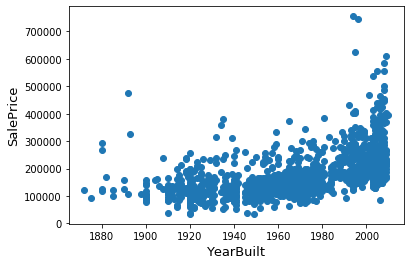

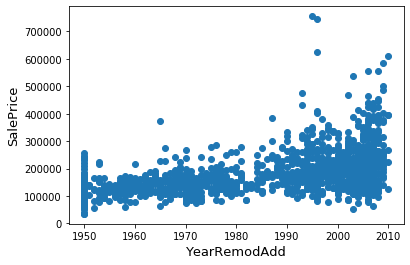

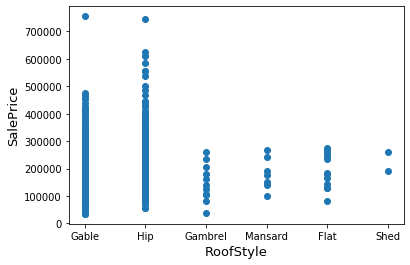

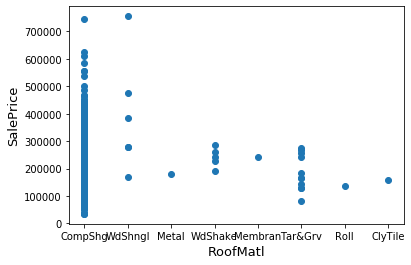

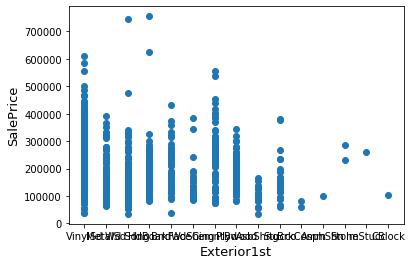

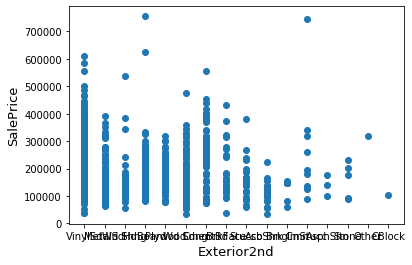

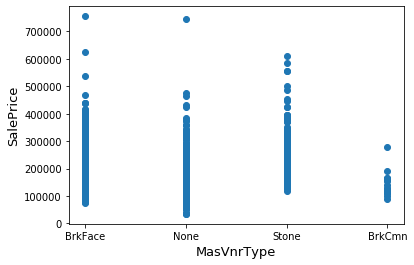

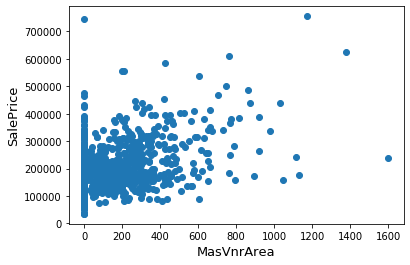

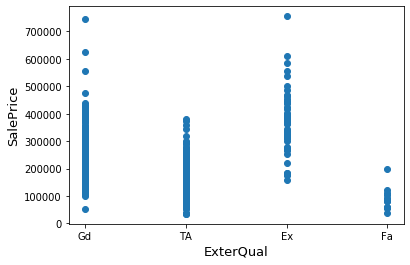

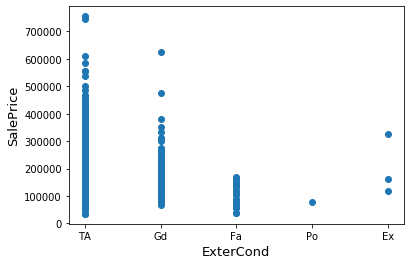

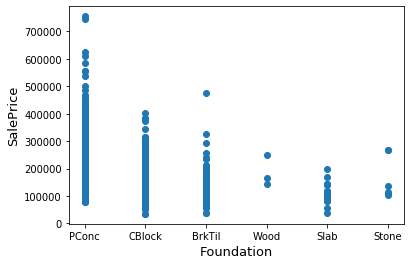

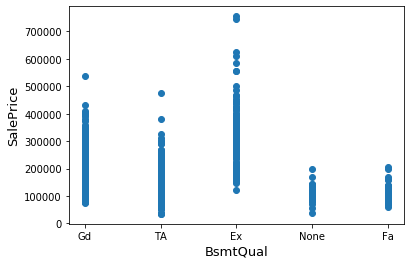

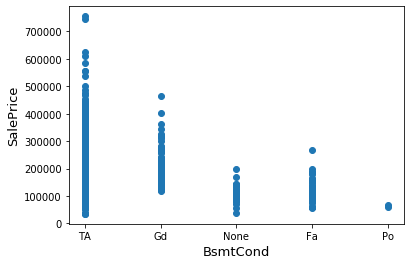

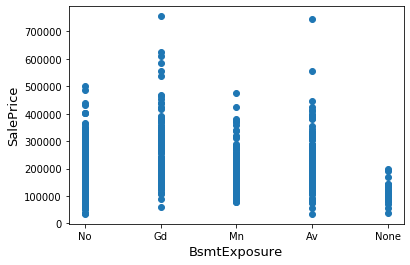

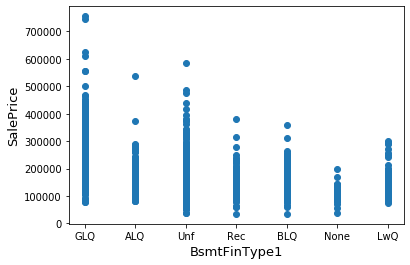

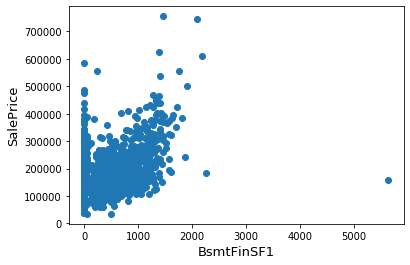

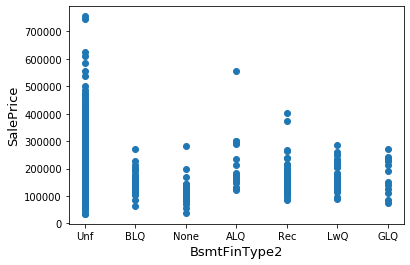

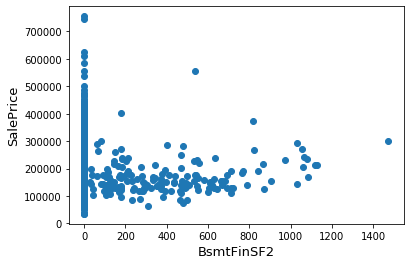

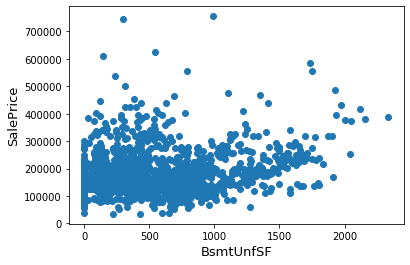

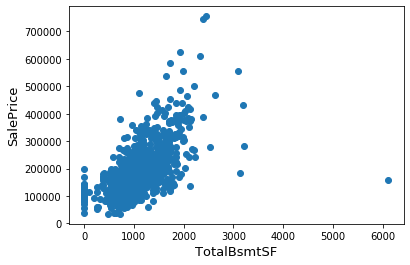

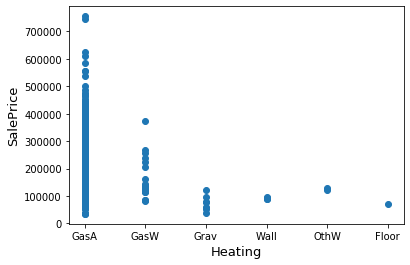

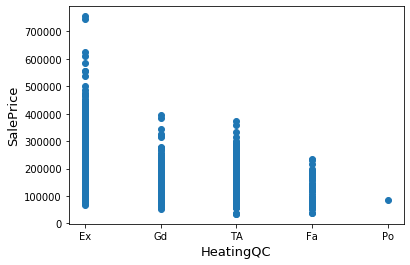

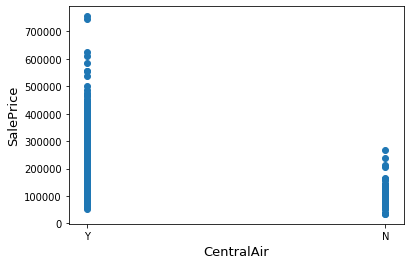

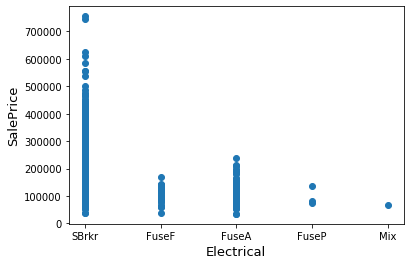

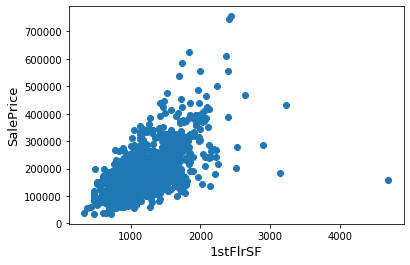

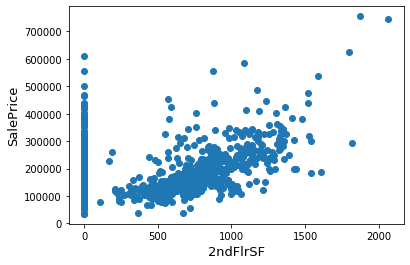

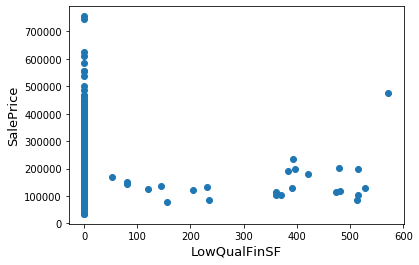

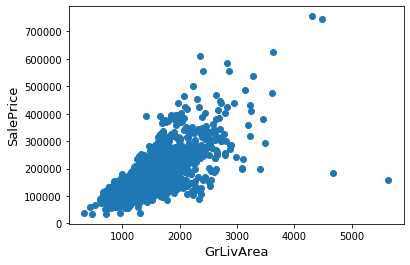

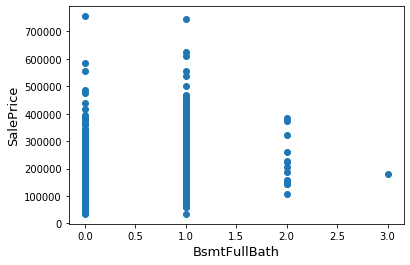

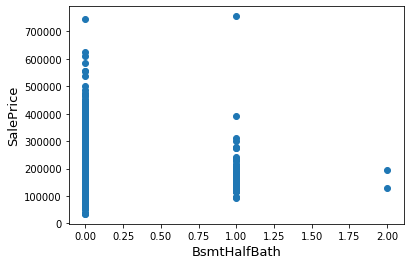

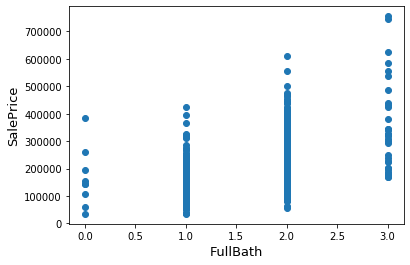

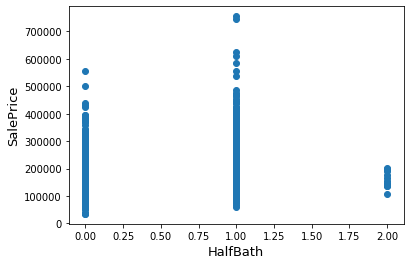

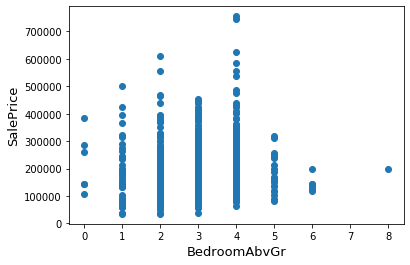

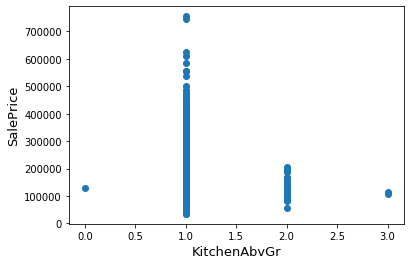

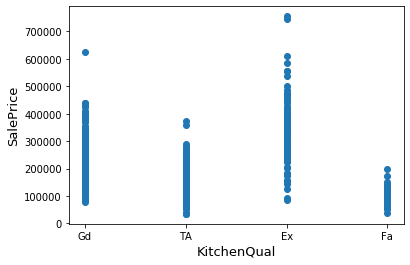

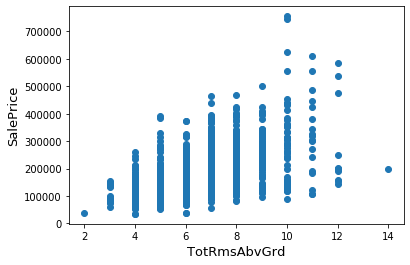

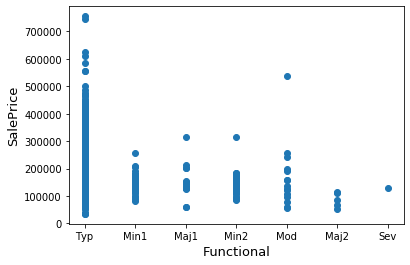

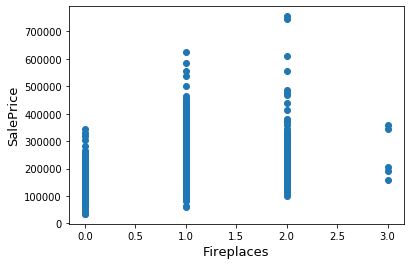

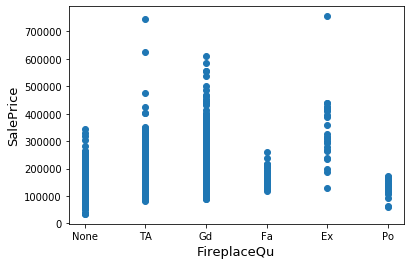

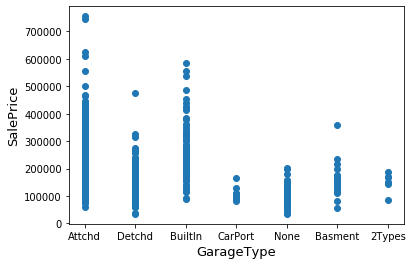

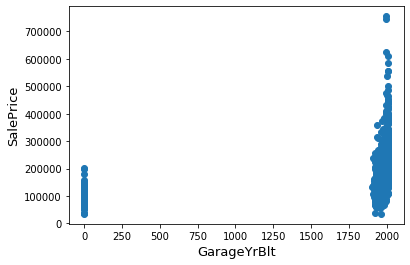

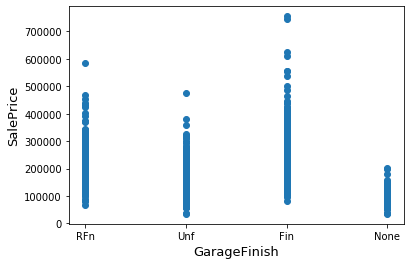

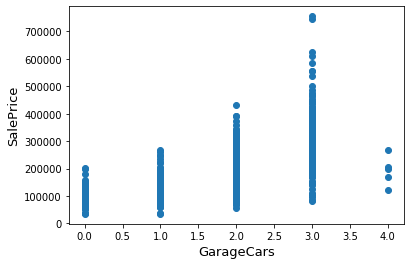

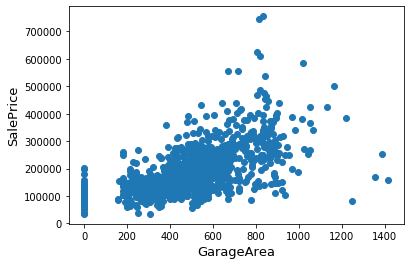

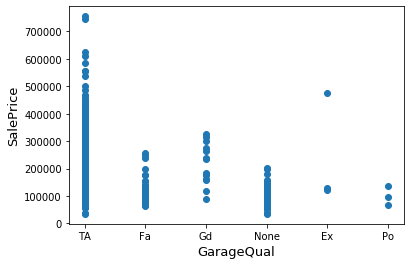

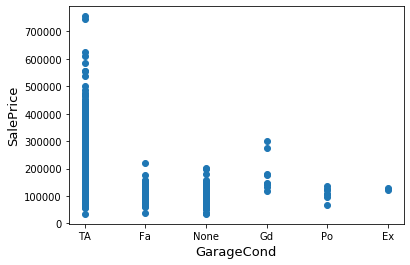

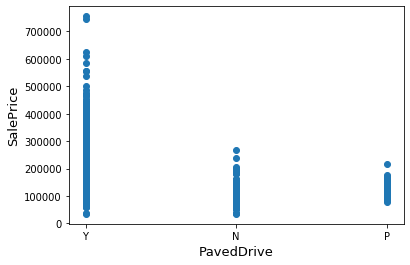

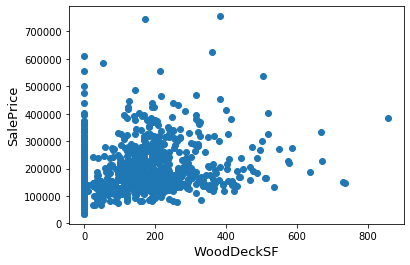

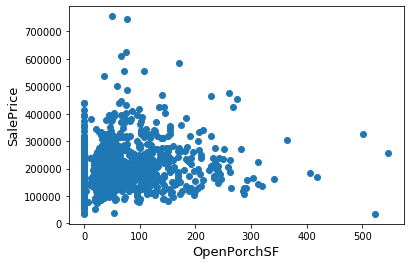

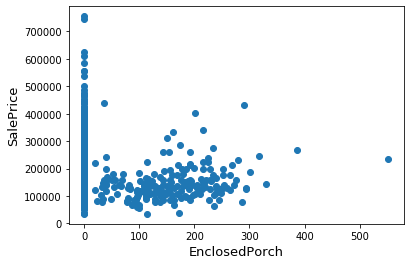

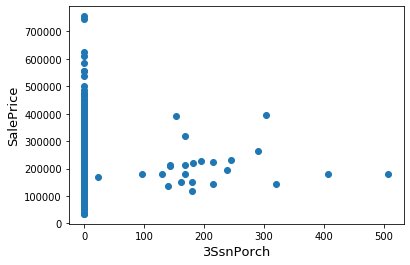

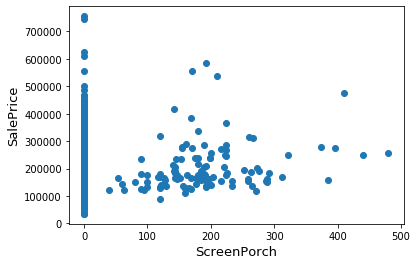

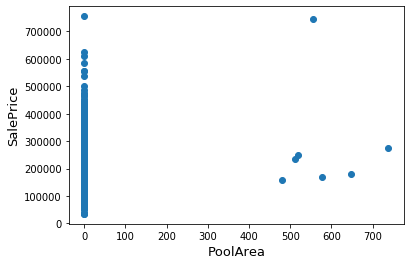

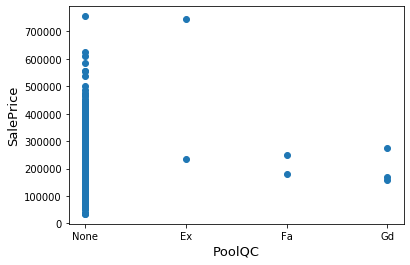

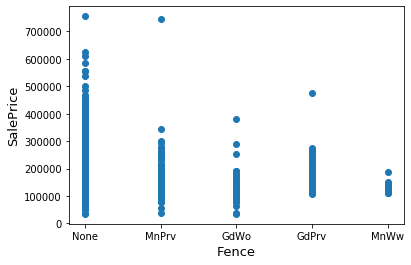

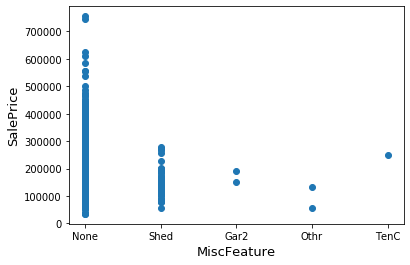

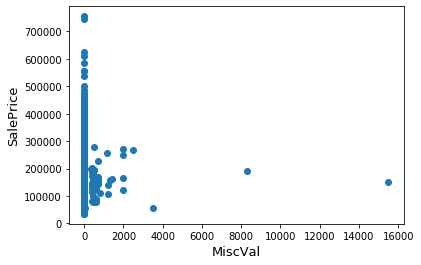

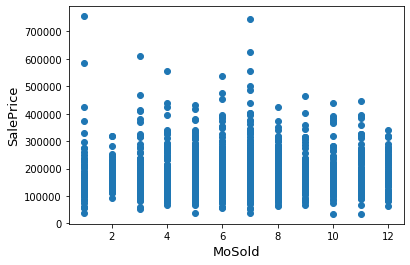

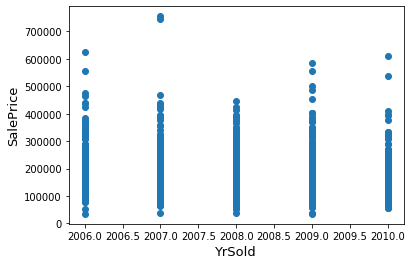

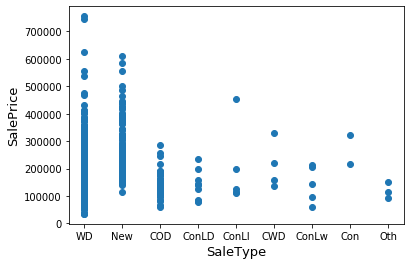

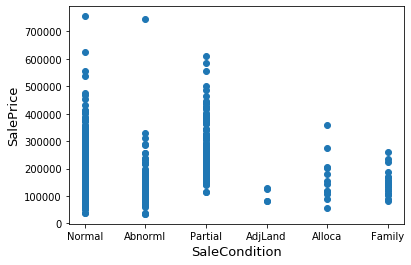

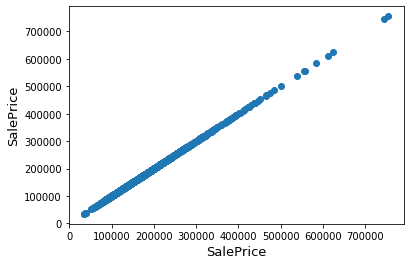

In [138]:
for col in train.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

In [139]:
# drop outliers you saw
train = train[(train.LotFrontage <300 )]

train = train[(train.LotArea < 100000 )]

i = train[((train.OverallCond == 2) &( train.SalePrice == 300000))].index
train.drop(i,inplace=True)

train = train[(train.TotalBsmtSF < 5000 )]

train = train[(train['1stFlrSF'] < 4000 )]

i = train[((train.GrLivArea > 4000) &( train.SalePrice < 300000))].index
train.drop(i,inplace=True)

i = train[((train.GarageArea > 1200) &( train.SalePrice < 300000))].index
train.drop(i,inplace=True)


In [140]:
df = pd.concat((train, test)).reset_index(drop=True)

In [20]:
df[0:500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      1          60       RL    65.000000     8450   Pave  None      Reg   
1      2          20       RL    80.000000     9600   Pave  None      Reg   
2      3          60       RL    68.000000    11250   Pave  None      IR1   
3      4          70       RL    60.000000     9550   Pave  None      IR1   
4      5          60       RL    84.000000    14260   Pave  None      IR1   
5      6          50       RL    85.000000    14115   Pave  None      IR1   
6      7          20       RL    75.000000    10084   Pave  None      Reg   
7      8          60       RL    68.277138    10382   Pave  None      IR1   
8      9          50       RM    51.000000     6120   Pave  None      Reg   
9     10         190       RL    50.000000     7420   Pave  None      Reg   
10    11          20       RL    70.000000    11200   Pave  None      Reg   
11    12          60       RL    85.000000    11924   Pave  None      IR1   
12    13          20       RL    56.250000    12968   Pave  None      IR2   
13    14          20       RL    91.000000    10652   Pave  None      IR1   
14    15          20       RL    77.282072    10920   Pave  None      IR1   
15    16          45       RM    51.000000     6120   Pave  None      Reg   
16    17          20       RL    61.924342    11241   Pave  None      IR1   
17    18          90       RL    72.000000    10791   Pave  None      Reg   
18    19          20       RL    66.000000    13695   Pave  None      Reg   
19    20          20       RL    70.000000     7560   Pave  None      Reg   
20    21          60       RL   101.000000    14215   Pave  None      IR1   
21    22          45       RM    57.000000     7449   Pave  Grvl      Reg   
22    23          20       RL    75.000000     9742   Pave  None      Reg   
23    24         120       RM    44.000000     4224   Pave  None      Reg   
24    25          20       RL    65.378289     8246   Pave  None      IR1   
25    26          20       RL   110.000000    14230   Pave  None      Reg   
26    27          20       RL    60.000000     7200   Pave  None      Reg   
27    28          20       RL    98.000000    11478   Pave  None      Reg   
28    29          20       RL    47.000000    16321   Pave  None      IR1   
29    30          30       RM    60.000000     6324   Pave  None      IR1   
30    31          70  C (all)    50.000000     8500   Pave  Pave      Reg   
31    32          20       RL    75.740132     8544   Pave  None      IR1   
32    33          20       RL    85.000000    11049   Pave  None      Reg   
33    34          20       RL    70.000000    10552   Pave  None      IR1   
34    35         120       RL    60.000000     7313   Pave  None      Reg   
35    36          60       RL   108.000000    13418   Pave  None      Reg   
36    37          20       RL   112.000000    10859   Pave  None      Reg   
37    38          20       RL    74.000000     8532   Pave  None      Reg   
38    39          20       RL    68.000000     7922   Pave  None      Reg   
39    40          90       RL    65.000000     6040   Pave  None      Reg   
40    41          20       RL    84.000000     8658   Pave  None      Reg   
41    42          20       RL   115.000000    16905   Pave  None      Reg   
42    43          85       RL    54.523026     9180   Pave  None      IR1   
43    44          20       RL    57.853618     9200   Pave  None      IR1   
44    45          20       RL    70.000000     7945   Pave  None      Reg   
45    46         120       RL    61.000000     7658   Pave  None      Reg   
46    47          50       RL    48.000000    12822   Pave  None      IR1   
47    48          20       FV    84.000000    11096   Pave  None      Reg   
48    49         190       RM    33.000000     4456   Pave  None      Reg   
49    50          20       RL    66.000000     7742   Pave  None      Reg   
50    51          60       RL    48.972039    13869   Pave  None      IR2   
51

## Data engineering


In [141]:
# mapping columns to be numerical                            
# some values like excellent/good/average/poor are meant to be numerical

df['ExterQualN'] = df['ExterQual'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['ExterQual'])

df['ExterCondN'] = df['ExterCond'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['ExterCond'])

df['BsmtQualN'] = df['BsmtQual'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['BsmtQual'])

df['BsmtCondN'] = df['BsmtCond'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['BsmtCond'])

df['BsmtExposureN'] = df['BsmtExposure'].map(
        {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df = df.drop(columns=['BsmtExposure'])

df['BsmtFinType1N'] = df['BsmtFinType1'].map(
        {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df = df.drop(columns=['BsmtFinType1'])

df['BsmtFinType2N'] = df['BsmtFinType2'].map(
        {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df = df.drop(columns=['BsmtFinType2'])

df['HeatingQCN'] = df['HeatingQC'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['HeatingQC'])

df['CentralAirN'] = df['CentralAir'].map(
        {'N':0,'Y':1})
df = df.drop(columns=['CentralAir'])

df['KitchenQualN'] = df['KitchenQual'].map(
        {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['KitchenQual'])

df['FireplaceQuN'] = df['FireplaceQu'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['FireplaceQu'])

df['GarageQualN'] = df['GarageQual'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['GarageQual'])

df['GarageCondN'] = df['GarageCond'].map(
        {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df = df.drop(columns=['GarageCond'])

df['PoolQCN'] = df['PoolQC'].map(
        {'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df = df.drop(columns=['PoolQC'])

df['Fence1N'] = df['Fence'].map(
        {'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
df = df.drop(columns=['Fence'])

#df.YrSold.unique() 
df['YrSoldN'] = df['YrSold'].map(
        {'2006':0,'2007':1,'2008':2,'2009':3,'2010':4})
df = df.drop(columns=['YrSold'])

In [142]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [143]:
# Gets categorical
for col in df.columns:
    if (df[col].dtypes == 'O'):
        df = pd.get_dummies(data=df, columns=[col])
        

In [40]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [ ]:
df = df.drop(['Id'], axis=1)


In [107]:


X_train = df[df['SalePrice'].notnull()]
Y_train = X_train['SalePrice']
X_train = X_train.drop(['SalePrice'], axis=1)
#X_train = downcast_dtypes(X_train)

X_test = df[df['SalePrice'].isnull()]
X_test = X_test.drop(['SalePrice'], axis=1)
#X_test = downcast_dtypes(X_test)
#del df

In [108]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=1)

In [185]:
ts = time.time()

model = XGBRegressor(
    max_depth=5,
    n_estimators=1000000,
    colsample_bytree=0.5, 
    colsample_bylevel=0.9, 
    subsample=0.2, 
    eta=0.009,
    tree_method='gpu_hist',
    #reg_lambda = 0.6,
    seed=140)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 400)

print(f' time elapsed: {time_elapsed(time.time() - ts)}')



[0]	validation_0-rmse:197213.93750	validation_1-rmse:189159.79688
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 400 rounds.
[1]	validation_0-rmse:195540.40625	validation_1-rmse:187521.48438
[2]	validation_0-rmse:193911.42188	validation_1-rmse:185921.65625
[3]	validation_0-rmse:192360.50000	validation_1-rmse:184358.37500
[4]	validation_0-rmse:190733.67188	validation_1-rmse:182796.96875
[5]	validation_0-rmse:189178.17188	validation_1-rmse:181230.14062
[6]	validation_0-rmse:187647.03125	validation_1-rmse:179722.78125
[7]	validation_0-rmse:186104.12500	validation_1-rmse:178172.95312
[8]	validation_0-rmse:184564.93750	validation_1-rmse:176662.15625
[9]	validation_0-rmse:183051.20312	validation_1-rmse:175193.31250
[10]	validation_0-rmse:181521.12500	validation_1-rmse:173678.76562
[11]	validation_0-rmse:179991.46875	validation_1-rmse:172225.09375
[12]	validation_0-rmse:178502.46875	validation

[121]	validation_0-rmse:76050.66406	validation_1-rmse:70569.50781
[122]	validation_0-rmse:75444.61719	validation_1-rmse:70019.47656
[123]	validation_0-rmse:74919.94531	validation_1-rmse:69517.40625
[124]	validation_0-rmse:74380.82812	validation_1-rmse:68975.45312
[125]	validation_0-rmse:73871.89844	validation_1-rmse:68479.50000
[126]	validation_0-rmse:73380.36719	validation_1-rmse:68010.63281
[127]	validation_0-rmse:72875.00781	validation_1-rmse:67486.49219
[128]	validation_0-rmse:72372.22656	validation_1-rmse:67006.18750
[129]	validation_0-rmse:71849.73438	validation_1-rmse:66496.78906
[130]	validation_0-rmse:71359.84375	validation_1-rmse:66006.39844
[131]	validation_0-rmse:70827.21094	validation_1-rmse:65443.37500
[132]	validation_0-rmse:70337.42188	validation_1-rmse:64979.33594
[133]	validation_0-rmse:69804.42969	validation_1-rmse:64455.04688
[134]	validation_0-rmse:69257.21875	validation_1-rmse:63960.81641
[135]	validation_0-rmse:68776.53125	validation_1-rmse:63502.98828
[136]	vali

[246]	validation_0-rmse:35715.43359	validation_1-rmse:31646.60938
[247]	validation_0-rmse:35530.87891	validation_1-rmse:31471.63086
[248]	validation_0-rmse:35381.22656	validation_1-rmse:31329.02148
[249]	validation_0-rmse:35247.75000	validation_1-rmse:31199.87500
[250]	validation_0-rmse:35100.41406	validation_1-rmse:31055.32422
[251]	validation_0-rmse:34943.51562	validation_1-rmse:30901.92188
[252]	validation_0-rmse:34786.84766	validation_1-rmse:30775.00586
[253]	validation_0-rmse:34641.51953	validation_1-rmse:30675.47070
[254]	validation_0-rmse:34440.92969	validation_1-rmse:30519.57422
[255]	validation_0-rmse:34293.67578	validation_1-rmse:30377.19141
[256]	validation_0-rmse:34120.33984	validation_1-rmse:30261.15820
[257]	validation_0-rmse:33978.57031	validation_1-rmse:30123.53320
[258]	validation_0-rmse:33791.68359	validation_1-rmse:29939.83594
[259]	validation_0-rmse:33637.30859	validation_1-rmse:29811.97266
[260]	validation_0-rmse:33485.62109	validation_1-rmse:29677.59375
[261]	vali

[371]	validation_0-rmse:23228.88281	validation_1-rmse:21134.03320
[372]	validation_0-rmse:23180.32617	validation_1-rmse:21098.84766
[373]	validation_0-rmse:23125.54102	validation_1-rmse:21046.37695
[374]	validation_0-rmse:23075.49023	validation_1-rmse:21021.15820
[375]	validation_0-rmse:23019.90039	validation_1-rmse:21001.03320
[376]	validation_0-rmse:22959.45508	validation_1-rmse:20950.36133
[377]	validation_0-rmse:22921.01172	validation_1-rmse:20929.18359
[378]	validation_0-rmse:22875.95508	validation_1-rmse:20887.61133
[379]	validation_0-rmse:22811.16406	validation_1-rmse:20853.05664
[380]	validation_0-rmse:22743.16406	validation_1-rmse:20791.03516
[381]	validation_0-rmse:22708.83398	validation_1-rmse:20765.35742
[382]	validation_0-rmse:22677.57422	validation_1-rmse:20732.65039
[383]	validation_0-rmse:22652.23438	validation_1-rmse:20711.33008
[384]	validation_0-rmse:22593.47070	validation_1-rmse:20668.65820
[385]	validation_0-rmse:22540.03906	validation_1-rmse:20620.32617
[386]	vali

[496]	validation_0-rmse:18829.99219	validation_1-rmse:18239.66406
[497]	validation_0-rmse:18798.87109	validation_1-rmse:18218.67188
[498]	validation_0-rmse:18780.79883	validation_1-rmse:18190.68164
[499]	validation_0-rmse:18761.58398	validation_1-rmse:18178.59570
[500]	validation_0-rmse:18739.91992	validation_1-rmse:18156.08789
[501]	validation_0-rmse:18725.10938	validation_1-rmse:18147.82422
[502]	validation_0-rmse:18717.88281	validation_1-rmse:18157.30078
[503]	validation_0-rmse:18679.47266	validation_1-rmse:18139.33398
[504]	validation_0-rmse:18661.26367	validation_1-rmse:18131.41602
[505]	validation_0-rmse:18642.70703	validation_1-rmse:18111.57031
[506]	validation_0-rmse:18628.98047	validation_1-rmse:18110.89258
[507]	validation_0-rmse:18617.39648	validation_1-rmse:18113.84375
[508]	validation_0-rmse:18610.27539	validation_1-rmse:18092.34180
[509]	validation_0-rmse:18599.06445	validation_1-rmse:18077.75195
[510]	validation_0-rmse:18570.49609	validation_1-rmse:18054.81445
[511]	vali

[621]	validation_0-rmse:16699.13477	validation_1-rmse:17487.38477
[622]	validation_0-rmse:16691.51367	validation_1-rmse:17485.95117
[623]	validation_0-rmse:16676.23828	validation_1-rmse:17480.19336
[624]	validation_0-rmse:16667.67773	validation_1-rmse:17470.32812
[625]	validation_0-rmse:16663.26758	validation_1-rmse:17466.39648
[626]	validation_0-rmse:16640.54688	validation_1-rmse:17439.46484
[627]	validation_0-rmse:16623.47070	validation_1-rmse:17441.13477
[628]	validation_0-rmse:16621.64062	validation_1-rmse:17430.02930
[629]	validation_0-rmse:16611.11914	validation_1-rmse:17424.97070
[630]	validation_0-rmse:16595.87109	validation_1-rmse:17414.58984
[631]	validation_0-rmse:16585.59375	validation_1-rmse:17405.96484
[632]	validation_0-rmse:16573.80078	validation_1-rmse:17386.85938
[633]	validation_0-rmse:16561.69336	validation_1-rmse:17391.34766
[634]	validation_0-rmse:16548.98242	validation_1-rmse:17389.46484
[635]	validation_0-rmse:16541.18945	validation_1-rmse:17377.74023
[636]	vali

[746]	validation_0-rmse:15471.25586	validation_1-rmse:16990.38672
[747]	validation_0-rmse:15465.06152	validation_1-rmse:16989.42773
[748]	validation_0-rmse:15460.94922	validation_1-rmse:16986.16406
[749]	validation_0-rmse:15453.39844	validation_1-rmse:16988.02930
[750]	validation_0-rmse:15436.19922	validation_1-rmse:16989.57422
[751]	validation_0-rmse:15425.79297	validation_1-rmse:16980.81055
[752]	validation_0-rmse:15422.65723	validation_1-rmse:16969.06445
[753]	validation_0-rmse:15415.63379	validation_1-rmse:16972.61133
[754]	validation_0-rmse:15405.17285	validation_1-rmse:16986.52734
[755]	validation_0-rmse:15401.22754	validation_1-rmse:16997.66406
[756]	validation_0-rmse:15384.24902	validation_1-rmse:16974.00000
[757]	validation_0-rmse:15382.41211	validation_1-rmse:16971.10938
[758]	validation_0-rmse:15374.80371	validation_1-rmse:16960.44922
[759]	validation_0-rmse:15374.03516	validation_1-rmse:16962.46680
[760]	validation_0-rmse:15371.32324	validation_1-rmse:16955.26562
[761]	vali

[871]	validation_0-rmse:14444.56055	validation_1-rmse:16776.65039
[872]	validation_0-rmse:14439.91992	validation_1-rmse:16769.69141
[873]	validation_0-rmse:14434.96680	validation_1-rmse:16762.70898
[874]	validation_0-rmse:14423.62598	validation_1-rmse:16766.24414
[875]	validation_0-rmse:14417.66504	validation_1-rmse:16770.09961
[876]	validation_0-rmse:14413.52539	validation_1-rmse:16771.24609
[877]	validation_0-rmse:14405.50293	validation_1-rmse:16763.19531
[878]	validation_0-rmse:14392.46875	validation_1-rmse:16766.16406
[879]	validation_0-rmse:14384.26758	validation_1-rmse:16766.46680
[880]	validation_0-rmse:14377.16406	validation_1-rmse:16770.63672
[881]	validation_0-rmse:14366.20996	validation_1-rmse:16758.68750
[882]	validation_0-rmse:14357.61719	validation_1-rmse:16765.12891
[883]	validation_0-rmse:14351.19531	validation_1-rmse:16765.71875
[884]	validation_0-rmse:14341.12500	validation_1-rmse:16771.63672
[885]	validation_0-rmse:14338.76660	validation_1-rmse:16767.07617
[886]	vali

[996]	validation_0-rmse:13690.23926	validation_1-rmse:16628.59961
[997]	validation_0-rmse:13687.42285	validation_1-rmse:16630.97656
[998]	validation_0-rmse:13681.70703	validation_1-rmse:16633.80273
[999]	validation_0-rmse:13675.85938	validation_1-rmse:16639.05469
[1000]	validation_0-rmse:13674.19727	validation_1-rmse:16631.74219
[1001]	validation_0-rmse:13673.73535	validation_1-rmse:16620.11328
[1002]	validation_0-rmse:13667.76367	validation_1-rmse:16622.64062
[1003]	validation_0-rmse:13662.80762	validation_1-rmse:16627.28320
[1004]	validation_0-rmse:13660.65527	validation_1-rmse:16624.62695
[1005]	validation_0-rmse:13655.48926	validation_1-rmse:16630.30273
[1006]	validation_0-rmse:13648.79492	validation_1-rmse:16632.25781
[1007]	validation_0-rmse:13640.31543	validation_1-rmse:16630.59570
[1008]	validation_0-rmse:13640.14746	validation_1-rmse:16631.72070
[1009]	validation_0-rmse:13630.68750	validation_1-rmse:16629.40234
[1010]	validation_0-rmse:13617.88379	validation_1-rmse:16625.98828

[1119]	validation_0-rmse:13018.09570	validation_1-rmse:16502.21875
[1120]	validation_0-rmse:13012.19531	validation_1-rmse:16502.83789
[1121]	validation_0-rmse:13008.24902	validation_1-rmse:16498.19727
[1122]	validation_0-rmse:13002.12988	validation_1-rmse:16495.91211
[1123]	validation_0-rmse:13000.28711	validation_1-rmse:16494.80078
[1124]	validation_0-rmse:12993.22168	validation_1-rmse:16481.40234
[1125]	validation_0-rmse:12984.31836	validation_1-rmse:16477.12695
[1126]	validation_0-rmse:12985.29981	validation_1-rmse:16483.32227
[1127]	validation_0-rmse:12978.88867	validation_1-rmse:16484.99414
[1128]	validation_0-rmse:12976.27734	validation_1-rmse:16490.14062
[1129]	validation_0-rmse:12971.13184	validation_1-rmse:16491.36328
[1130]	validation_0-rmse:12967.11523	validation_1-rmse:16484.34961
[1131]	validation_0-rmse:12958.94629	validation_1-rmse:16492.36914
[1132]	validation_0-rmse:12954.29981	validation_1-rmse:16488.08789
[1133]	validation_0-rmse:12952.32812	validation_1-rmse:16490.5

[1242]	validation_0-rmse:12448.60644	validation_1-rmse:16471.11328
[1243]	validation_0-rmse:12445.05957	validation_1-rmse:16466.67188
[1244]	validation_0-rmse:12439.99316	validation_1-rmse:16467.27344
[1245]	validation_0-rmse:12435.54102	validation_1-rmse:16463.91211
[1246]	validation_0-rmse:12428.56738	validation_1-rmse:16467.00000
[1247]	validation_0-rmse:12418.00391	validation_1-rmse:16467.45898
[1248]	validation_0-rmse:12414.59180	validation_1-rmse:16464.96875
[1249]	validation_0-rmse:12406.31543	validation_1-rmse:16461.52930
[1250]	validation_0-rmse:12402.91406	validation_1-rmse:16455.41602
[1251]	validation_0-rmse:12399.74609	validation_1-rmse:16461.31836
[1252]	validation_0-rmse:12395.46875	validation_1-rmse:16457.68750
[1253]	validation_0-rmse:12392.42773	validation_1-rmse:16461.38281
[1254]	validation_0-rmse:12389.62793	validation_1-rmse:16446.13867
[1255]	validation_0-rmse:12386.86328	validation_1-rmse:16441.00781
[1256]	validation_0-rmse:12380.77734	validation_1-rmse:16446.8

[1365]	validation_0-rmse:11932.45215	validation_1-rmse:16405.49609
[1366]	validation_0-rmse:11928.33789	validation_1-rmse:16401.95117
[1367]	validation_0-rmse:11923.73731	validation_1-rmse:16406.60352
[1368]	validation_0-rmse:11919.95898	validation_1-rmse:16404.85156
[1369]	validation_0-rmse:11918.66797	validation_1-rmse:16411.21875
[1370]	validation_0-rmse:11914.47949	validation_1-rmse:16411.36914
[1371]	validation_0-rmse:11909.00586	validation_1-rmse:16416.26172
[1372]	validation_0-rmse:11903.78516	validation_1-rmse:16417.70117
[1373]	validation_0-rmse:11898.22656	validation_1-rmse:16416.42578
[1374]	validation_0-rmse:11897.91797	validation_1-rmse:16418.21875
[1375]	validation_0-rmse:11892.64941	validation_1-rmse:16414.11523
[1376]	validation_0-rmse:11888.65527	validation_1-rmse:16409.35742
[1377]	validation_0-rmse:11883.01856	validation_1-rmse:16410.06055
[1378]	validation_0-rmse:11879.87695	validation_1-rmse:16406.80859
[1379]	validation_0-rmse:11876.50781	validation_1-rmse:16405.3

[1488]	validation_0-rmse:11430.05469	validation_1-rmse:16372.86621
[1489]	validation_0-rmse:11421.63769	validation_1-rmse:16371.07422
[1490]	validation_0-rmse:11418.96094	validation_1-rmse:16370.66894
[1491]	validation_0-rmse:11416.51465	validation_1-rmse:16368.76660
[1492]	validation_0-rmse:11409.36133	validation_1-rmse:16368.95117
[1493]	validation_0-rmse:11405.63867	validation_1-rmse:16371.61621
[1494]	validation_0-rmse:11400.45508	validation_1-rmse:16367.31055
[1495]	validation_0-rmse:11396.45312	validation_1-rmse:16368.89941
[1496]	validation_0-rmse:11394.56934	validation_1-rmse:16380.16113
[1497]	validation_0-rmse:11389.33984	validation_1-rmse:16381.54688
[1498]	validation_0-rmse:11387.30176	validation_1-rmse:16384.42383
[1499]	validation_0-rmse:11385.05078	validation_1-rmse:16377.23633
[1500]	validation_0-rmse:11379.04590	validation_1-rmse:16376.67871
[1501]	validation_0-rmse:11374.52441	validation_1-rmse:16380.44141
[1502]	validation_0-rmse:11372.18066	validation_1-rmse:16379.6

[1611]	validation_0-rmse:10995.28613	validation_1-rmse:16278.00488
[1612]	validation_0-rmse:10990.96484	validation_1-rmse:16275.05859
[1613]	validation_0-rmse:10989.36914	validation_1-rmse:16274.09277
[1614]	validation_0-rmse:10983.90527	validation_1-rmse:16269.30273
[1615]	validation_0-rmse:10981.56836	validation_1-rmse:16268.55273
[1616]	validation_0-rmse:10978.72852	validation_1-rmse:16271.72461
[1617]	validation_0-rmse:10976.18066	validation_1-rmse:16269.42871
[1618]	validation_0-rmse:10971.01465	validation_1-rmse:16268.39062
[1619]	validation_0-rmse:10969.84277	validation_1-rmse:16271.71777
[1620]	validation_0-rmse:10964.85352	validation_1-rmse:16272.79297
[1621]	validation_0-rmse:10958.86523	validation_1-rmse:16266.55273
[1622]	validation_0-rmse:10954.79590	validation_1-rmse:16263.86914
[1623]	validation_0-rmse:10951.77148	validation_1-rmse:16265.76367
[1624]	validation_0-rmse:10946.39648	validation_1-rmse:16260.25098
[1625]	validation_0-rmse:10942.77148	validation_1-rmse:16261.0

[1734]	validation_0-rmse:10553.35938	validation_1-rmse:16288.22168
[1735]	validation_0-rmse:10551.01660	validation_1-rmse:16285.90723
[1736]	validation_0-rmse:10549.58301	validation_1-rmse:16287.90918
[1737]	validation_0-rmse:10541.65820	validation_1-rmse:16285.49023
[1738]	validation_0-rmse:10538.11914	validation_1-rmse:16287.43066
[1739]	validation_0-rmse:10536.90332	validation_1-rmse:16282.27441
[1740]	validation_0-rmse:10530.29199	validation_1-rmse:16284.02441
[1741]	validation_0-rmse:10526.04883	validation_1-rmse:16277.19434
[1742]	validation_0-rmse:10523.76953	validation_1-rmse:16279.53516
[1743]	validation_0-rmse:10518.24707	validation_1-rmse:16273.23731
[1744]	validation_0-rmse:10514.94531	validation_1-rmse:16269.47754
[1745]	validation_0-rmse:10512.52148	validation_1-rmse:16267.19629
[1746]	validation_0-rmse:10510.11328	validation_1-rmse:16264.85644
[1747]	validation_0-rmse:10509.00684	validation_1-rmse:16266.25879
[1748]	validation_0-rmse:10508.26172	validation_1-rmse:16265.0

[1857]	validation_0-rmse:10144.14551	validation_1-rmse:16231.28027
[1858]	validation_0-rmse:10138.91016	validation_1-rmse:16231.79785
[1859]	validation_0-rmse:10133.88672	validation_1-rmse:16229.97656
[1860]	validation_0-rmse:10130.12109	validation_1-rmse:16237.09863
[1861]	validation_0-rmse:10127.67773	validation_1-rmse:16241.99609
[1862]	validation_0-rmse:10122.71973	validation_1-rmse:16247.02734
[1863]	validation_0-rmse:10120.19531	validation_1-rmse:16250.32324
[1864]	validation_0-rmse:10114.89160	validation_1-rmse:16247.74219
[1865]	validation_0-rmse:10110.56641	validation_1-rmse:16239.83398
[1866]	validation_0-rmse:10108.62793	validation_1-rmse:16240.24609
[1867]	validation_0-rmse:10107.71875	validation_1-rmse:16241.72559
[1868]	validation_0-rmse:10104.01660	validation_1-rmse:16237.53711
[1869]	validation_0-rmse:10103.18848	validation_1-rmse:16238.63965
[1870]	validation_0-rmse:10102.42285	validation_1-rmse:16242.17383
[1871]	validation_0-rmse:10099.18359	validation_1-rmse:16243.9

[1981]	validation_0-rmse:9733.88477	validation_1-rmse:16145.55762
[1982]	validation_0-rmse:9730.85840	validation_1-rmse:16147.29883
[1983]	validation_0-rmse:9728.89160	validation_1-rmse:16145.62402
[1984]	validation_0-rmse:9725.64648	validation_1-rmse:16149.76660
[1985]	validation_0-rmse:9720.87402	validation_1-rmse:16151.75293
[1986]	validation_0-rmse:9717.99023	validation_1-rmse:16147.87695
[1987]	validation_0-rmse:9715.05957	validation_1-rmse:16139.72070
[1988]	validation_0-rmse:9712.00293	validation_1-rmse:16137.17188
[1989]	validation_0-rmse:9706.67285	validation_1-rmse:16136.29590
[1990]	validation_0-rmse:9702.44434	validation_1-rmse:16136.62891
[1991]	validation_0-rmse:9694.07812	validation_1-rmse:16131.01465
[1992]	validation_0-rmse:9689.61523	validation_1-rmse:16130.52930
[1993]	validation_0-rmse:9686.54590	validation_1-rmse:16132.71973
[1994]	validation_0-rmse:9683.67676	validation_1-rmse:16139.18262
[1995]	validation_0-rmse:9679.12012	validation_1-rmse:16138.64648
[1996]	val

[2106]	validation_0-rmse:9359.62988	validation_1-rmse:16104.55566
[2107]	validation_0-rmse:9356.96094	validation_1-rmse:16104.62988
[2108]	validation_0-rmse:9354.05957	validation_1-rmse:16109.16797
[2109]	validation_0-rmse:9350.70801	validation_1-rmse:16103.05273
[2110]	validation_0-rmse:9349.23242	validation_1-rmse:16104.63574
[2111]	validation_0-rmse:9346.00879	validation_1-rmse:16101.40820
[2112]	validation_0-rmse:9340.15332	validation_1-rmse:16097.56348
[2113]	validation_0-rmse:9335.92676	validation_1-rmse:16097.01367
[2114]	validation_0-rmse:9332.58691	validation_1-rmse:16099.83398
[2115]	validation_0-rmse:9328.26953	validation_1-rmse:16101.93164
[2116]	validation_0-rmse:9324.82324	validation_1-rmse:16098.18164
[2117]	validation_0-rmse:9323.62500	validation_1-rmse:16099.65527
[2118]	validation_0-rmse:9321.49902	validation_1-rmse:16105.19238
[2119]	validation_0-rmse:9318.56934	validation_1-rmse:16107.73438
[2120]	validation_0-rmse:9315.67969	validation_1-rmse:16110.14844
[2121]	val

[2231]	validation_0-rmse:9025.01856	validation_1-rmse:16046.31445
[2232]	validation_0-rmse:9021.37598	validation_1-rmse:16049.17188
[2233]	validation_0-rmse:9019.48340	validation_1-rmse:16047.04004
[2234]	validation_0-rmse:9016.06836	validation_1-rmse:16046.88086
[2235]	validation_0-rmse:9014.35742	validation_1-rmse:16048.07324
[2236]	validation_0-rmse:9012.16113	validation_1-rmse:16046.64356
[2237]	validation_0-rmse:9008.97852	validation_1-rmse:16047.39648
[2238]	validation_0-rmse:9006.39356	validation_1-rmse:16047.17578
[2239]	validation_0-rmse:9002.69434	validation_1-rmse:16041.95801
[2240]	validation_0-rmse:9000.93750	validation_1-rmse:16045.06641
[2241]	validation_0-rmse:8998.50781	validation_1-rmse:16048.01660
[2242]	validation_0-rmse:8996.33008	validation_1-rmse:16046.96582
[2243]	validation_0-rmse:8994.82910	validation_1-rmse:16051.49609
[2244]	validation_0-rmse:8994.45606	validation_1-rmse:16047.87598
[2245]	validation_0-rmse:8989.31543	validation_1-rmse:16047.98340
[2246]	val

[2356]	validation_0-rmse:8705.95703	validation_1-rmse:16054.00098
[2357]	validation_0-rmse:8706.17578	validation_1-rmse:16048.95606
[2358]	validation_0-rmse:8701.64453	validation_1-rmse:16049.28711
[2359]	validation_0-rmse:8699.79492	validation_1-rmse:16049.70996
[2360]	validation_0-rmse:8697.02637	validation_1-rmse:16047.73828
[2361]	validation_0-rmse:8693.58301	validation_1-rmse:16057.31836
[2362]	validation_0-rmse:8692.75098	validation_1-rmse:16056.22656
[2363]	validation_0-rmse:8690.67676	validation_1-rmse:16060.11426
[2364]	validation_0-rmse:8688.37207	validation_1-rmse:16062.28906
[2365]	validation_0-rmse:8685.38477	validation_1-rmse:16062.18066
[2366]	validation_0-rmse:8681.78223	validation_1-rmse:16060.70410
[2367]	validation_0-rmse:8680.82422	validation_1-rmse:16059.10254
[2368]	validation_0-rmse:8679.20508	validation_1-rmse:16057.06250
[2369]	validation_0-rmse:8677.67969	validation_1-rmse:16055.18652
[2370]	validation_0-rmse:8675.36719	validation_1-rmse:16054.13672
[2371]	val

[2481]	validation_0-rmse:8373.37598	validation_1-rmse:16018.99414
[2482]	validation_0-rmse:8370.85840	validation_1-rmse:16017.01269
[2483]	validation_0-rmse:8368.08398	validation_1-rmse:16016.85156
[2484]	validation_0-rmse:8367.04004	validation_1-rmse:16017.15039
[2485]	validation_0-rmse:8365.01269	validation_1-rmse:16016.56641
[2486]	validation_0-rmse:8364.19531	validation_1-rmse:16014.61523
[2487]	validation_0-rmse:8363.61523	validation_1-rmse:16011.23633
[2488]	validation_0-rmse:8361.83106	validation_1-rmse:16011.96484
[2489]	validation_0-rmse:8359.64160	validation_1-rmse:16014.63379
[2490]	validation_0-rmse:8358.64941	validation_1-rmse:16018.51660
[2491]	validation_0-rmse:8356.62988	validation_1-rmse:16017.23828
[2492]	validation_0-rmse:8354.62305	validation_1-rmse:16016.40234
[2493]	validation_0-rmse:8351.69336	validation_1-rmse:16017.67871
[2494]	validation_0-rmse:8347.08496	validation_1-rmse:16017.02832
[2495]	validation_0-rmse:8343.78516	validation_1-rmse:16013.41797
[2496]	val

[2606]	validation_0-rmse:8053.24121	validation_1-rmse:15991.69922
[2607]	validation_0-rmse:8051.93213	validation_1-rmse:15990.26367
[2608]	validation_0-rmse:8049.98682	validation_1-rmse:15992.93750
[2609]	validation_0-rmse:8047.03809	validation_1-rmse:15991.06152
[2610]	validation_0-rmse:8046.37109	validation_1-rmse:15988.36621
[2611]	validation_0-rmse:8044.11133	validation_1-rmse:15986.82617
[2612]	validation_0-rmse:8041.87256	validation_1-rmse:15986.40234
[2613]	validation_0-rmse:8040.79736	validation_1-rmse:15986.29590
[2614]	validation_0-rmse:8039.38818	validation_1-rmse:15987.19238
[2615]	validation_0-rmse:8037.36621	validation_1-rmse:15984.73731
[2616]	validation_0-rmse:8037.01660	validation_1-rmse:15988.72949
[2617]	validation_0-rmse:8035.68750	validation_1-rmse:15987.74902
[2618]	validation_0-rmse:8032.52539	validation_1-rmse:15988.58789
[2619]	validation_0-rmse:8030.00195	validation_1-rmse:15989.61328
[2620]	validation_0-rmse:8027.13379	validation_1-rmse:15991.14062
[2621]	val

[2731]	validation_0-rmse:7776.44482	validation_1-rmse:15973.34766
[2732]	validation_0-rmse:7775.96924	validation_1-rmse:15970.19531
[2733]	validation_0-rmse:7774.52393	validation_1-rmse:15971.76367
[2734]	validation_0-rmse:7771.62695	validation_1-rmse:15965.01074
[2735]	validation_0-rmse:7768.79346	validation_1-rmse:15965.00977
[2736]	validation_0-rmse:7765.86768	validation_1-rmse:15966.66309
[2737]	validation_0-rmse:7765.28369	validation_1-rmse:15967.51758
[2738]	validation_0-rmse:7763.34473	validation_1-rmse:15967.12891
[2739]	validation_0-rmse:7761.89990	validation_1-rmse:15966.86426
[2740]	validation_0-rmse:7759.35645	validation_1-rmse:15965.57129
[2741]	validation_0-rmse:7756.00879	validation_1-rmse:15961.83301
[2742]	validation_0-rmse:7753.82080	validation_1-rmse:15962.49219
[2743]	validation_0-rmse:7749.74707	validation_1-rmse:15955.17383
[2744]	validation_0-rmse:7748.09668	validation_1-rmse:15957.01367
[2745]	validation_0-rmse:7745.48584	validation_1-rmse:15953.82812
[2746]	val

[2856]	validation_0-rmse:7511.97754	validation_1-rmse:15937.11231
[2857]	validation_0-rmse:7510.69775	validation_1-rmse:15937.85352
[2858]	validation_0-rmse:7509.41016	validation_1-rmse:15940.35938
[2859]	validation_0-rmse:7505.47900	validation_1-rmse:15939.51074
[2860]	validation_0-rmse:7504.71875	validation_1-rmse:15939.54102
[2861]	validation_0-rmse:7503.45166	validation_1-rmse:15939.60352
[2862]	validation_0-rmse:7501.98291	validation_1-rmse:15940.47949
[2863]	validation_0-rmse:7498.12793	validation_1-rmse:15938.81543
[2864]	validation_0-rmse:7494.57129	validation_1-rmse:15942.01269
[2865]	validation_0-rmse:7493.14453	validation_1-rmse:15946.26465
[2866]	validation_0-rmse:7491.62158	validation_1-rmse:15947.34668
[2867]	validation_0-rmse:7491.09912	validation_1-rmse:15948.03809
[2868]	validation_0-rmse:7488.90772	validation_1-rmse:15948.87305
[2869]	validation_0-rmse:7485.68018	validation_1-rmse:15955.94238
[2870]	validation_0-rmse:7484.35840	validation_1-rmse:15953.84766
[2871]	val

[2981]	validation_0-rmse:7252.62402	validation_1-rmse:15991.09473
[2982]	validation_0-rmse:7250.48877	validation_1-rmse:15988.23731
[2983]	validation_0-rmse:7249.37891	validation_1-rmse:15985.54883
[2984]	validation_0-rmse:7245.80029	validation_1-rmse:15979.57910
[2985]	validation_0-rmse:7243.32178	validation_1-rmse:15979.73047
[2986]	validation_0-rmse:7241.37695	validation_1-rmse:15979.22852
[2987]	validation_0-rmse:7240.35156	validation_1-rmse:15980.04394
[2988]	validation_0-rmse:7236.60596	validation_1-rmse:15980.29199
[2989]	validation_0-rmse:7235.53857	validation_1-rmse:15981.23047
[2990]	validation_0-rmse:7234.52051	validation_1-rmse:15978.41309
[2991]	validation_0-rmse:7232.24561	validation_1-rmse:15975.47559
[2992]	validation_0-rmse:7230.53125	validation_1-rmse:15974.66504
[2993]	validation_0-rmse:7228.32520	validation_1-rmse:15971.50195
[2994]	validation_0-rmse:7225.94873	validation_1-rmse:15970.31641
[2995]	validation_0-rmse:7222.88965	validation_1-rmse:15967.86035
[2996]	val

[3106]	validation_0-rmse:6993.44434	validation_1-rmse:15957.66992
[3107]	validation_0-rmse:6991.91895	validation_1-rmse:15955.96387
[3108]	validation_0-rmse:6990.37353	validation_1-rmse:15957.71387
[3109]	validation_0-rmse:6987.85059	validation_1-rmse:15953.97656
[3110]	validation_0-rmse:6986.89551	validation_1-rmse:15954.04981
[3111]	validation_0-rmse:6985.20654	validation_1-rmse:15954.90430
[3112]	validation_0-rmse:6982.47900	validation_1-rmse:15956.27441
[3113]	validation_0-rmse:6979.62500	validation_1-rmse:15956.80273
[3114]	validation_0-rmse:6975.63770	validation_1-rmse:15960.47656
[3115]	validation_0-rmse:6973.25049	validation_1-rmse:15963.51660
[3116]	validation_0-rmse:6972.59814	validation_1-rmse:15965.25293
[3117]	validation_0-rmse:6971.80615	validation_1-rmse:15966.42090
[3118]	validation_0-rmse:6970.95996	validation_1-rmse:15964.73828
[3119]	validation_0-rmse:6969.83594	validation_1-rmse:15965.20898
[3120]	validation_0-rmse:6966.60791	validation_1-rmse:15965.70703
[3121]	val

 time elapsed: 0:00:18.06


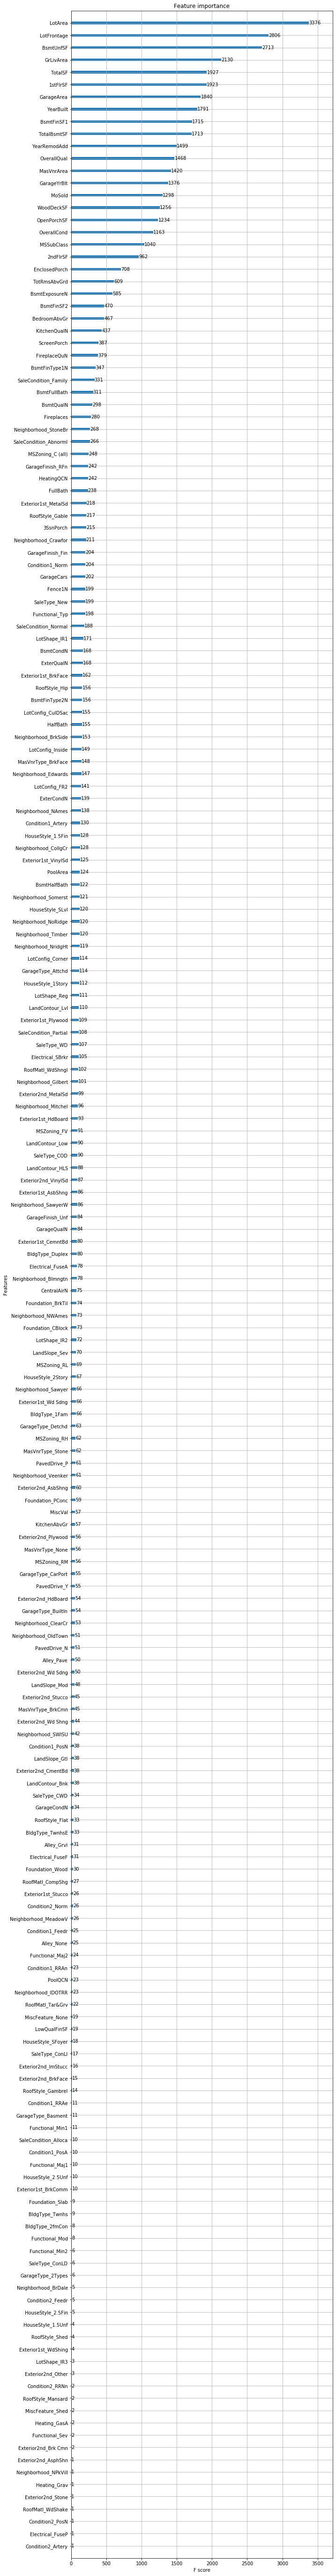

In [145]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,100))

In [186]:
test = pd.read_csv('H:/Projekty/House Prices/test.csv')
Y_test = model.predict(X_test)
submission = pd.DataFrame({
    "Id": test.Id, 
    "SalePrice": Y_test
})
submission.to_csv('H:/Projekty/House Prices/submission1.csv', index=False)